In [52]:
# 1. Se importan las bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# 2. Se carga el Dataset Vehicle (Se agrega el parametro latin-1 por la ñ)
datosC = pd.read_csv('D:/tarea_3/DatasetVehicleC.csv', encoding='latin-1')

In [56]:
# 3. Se visualizan los datos cargados
datosC.head(10)

,Nombre del Carro,Año de Fabricacion,Kilometraje Recorrido,Tipo de Combustible,Tipo de Vendedor,Tipo de Transmision,Numero de Propietarios Anteriores,Precio de Venta,Precio Original
0,ritz,2014,27000,Petrol,Dealer,Manual,0,4085.4,6817.1
1,sx4,2013,43000,Diesel,Dealer,Manual,0,5792.7,11634.1
2,ciaz,2017,6900,Petrol,Dealer,Manual,0,8841.5,12012.2
3,wagon r,2011,5200,Petrol,Dealer,Manual,0,3475.6,5061.0
4,swift,2014,42450,Diesel,Dealer,Manual,0,5609.8,8378.0
5,vitara brezza,2018,2071,Diesel,Dealer,Manual,0,11280.5,11987.8
6,ciaz,2015,18796,Petrol,Dealer,Manual,0,8231.7,9902.4
7,s cross,2015,33429,Diesel,Dealer,Manual,0,7926.8,10500.0
8,ciaz,2016,20273,Diesel,Dealer,Manual,0,10670.7,10841.5
9,ciaz,2015,42367,Diesel,Dealer,Manual,0,9085.4,10878.0


In [58]:
# 4. Se convierten las variables categóricas a numéricas usando Label Encoder
le = LabelEncoder()
datosC['Tipo de Combustible'] = le.fit_transform(datosC['Tipo de Combustible'])
datosC['Tipo de Vendedor'] = le.fit_transform(datosC['Tipo de Vendedor'])
datosC['Tipo de Transmision'] = le.fit_transform(datosC['Tipo de Transmision'])
datosC['Nombre del Carro'] = le.fit_transform(datosC['Nombre del Carro'])

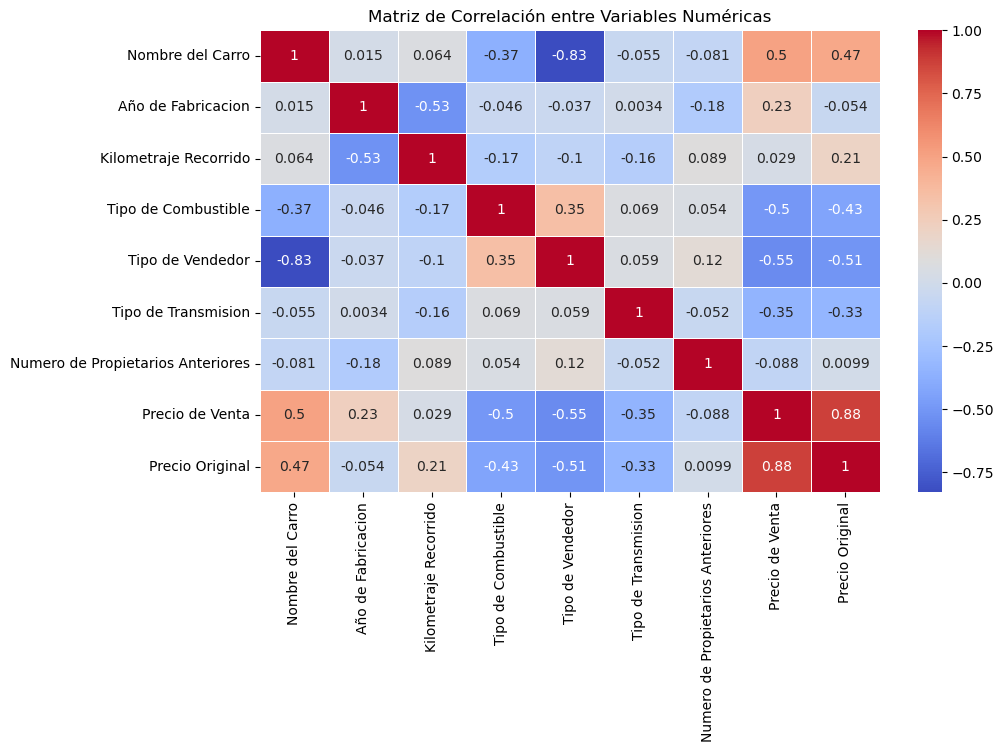

In [60]:
# 5. Se visualiza una matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(datosC.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

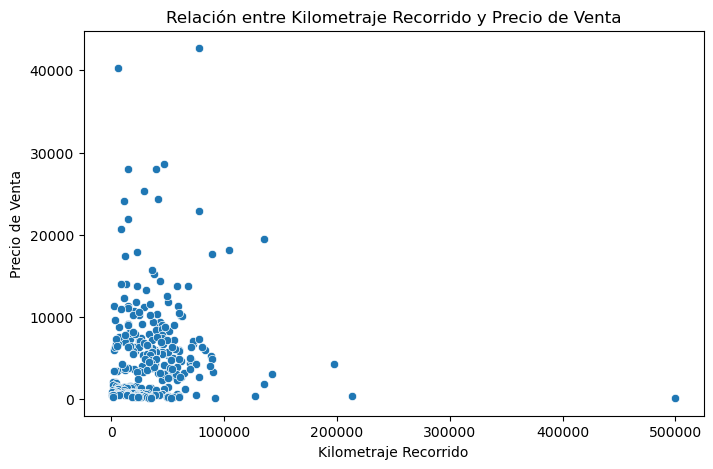

In [62]:
# 6. Se visualiza la relación entre Kilometraje Recorrido y Precio de Venta
plt.figure(figsize=(8,5))
sns.scatterplot(x='Kilometraje Recorrido', y='Precio de Venta', data=datosC)
plt.title('Relación entre Kilometraje Recorrido y Precio de Venta')
plt.show()

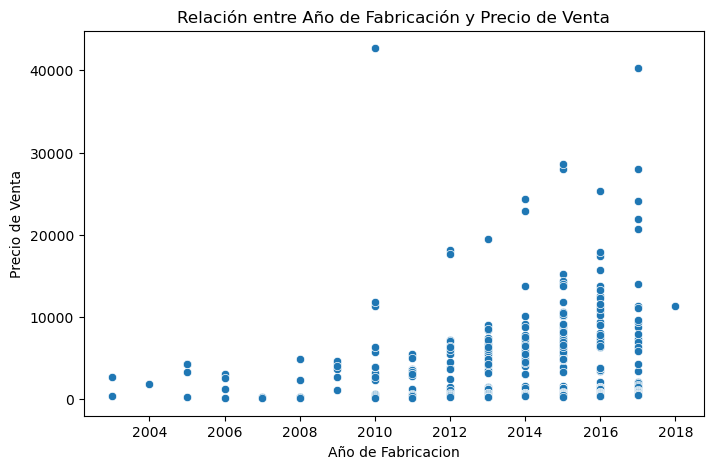

In [64]:
# Se visualiza la relación entre Año de Fabricacion y Precio de Venta
plt.figure(figsize=(8,5))
sns.scatterplot(x='Año de Fabricacion', y='Precio de Venta', data=datosC)
plt.title('Relación entre Año de Fabricación y Precio de Venta')
plt.show()

In [66]:
# 7. Se verifican los valores faltantes
print("Valores faltantes por columna:")
print(datosC.isnull().sum())

Valores faltantes por columna:
Nombre del Carro                     0
Año de Fabricacion                   0
Kilometraje Recorrido                0
Tipo de Combustible                  0
Tipo de Vendedor                     0
Tipo de Transmision                  0
Numero de Propietarios Anteriores    0
Precio de Venta                      0
Precio Original                      0
dtype: int64


In [68]:
# 8. Función para visualizar boxplots
def plot_boxplots(data, columns):
    fig, axes = plt.subplots(len(columns), 1, figsize=(7, 4*len(columns)))
    for i, column in enumerate(columns):
        sns.boxplot(x=data[column], ax=axes[i] if len(columns) > 1 else axes)
        (axes[i] if len(columns) > 1 else axes).set_title(f'Boxplot de {column}')
    plt.tight_layout()
    plt.show()

In [70]:
# 9. Función mejorada para detectar y manejar valores atípicos
def detect_outliers(data, column, n_std):
    mean = data[column].mean()
    std = data[column].std()
    cut_off = std * n_std
    lower, upper = mean - cut_off, mean + cut_off
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

def handle_outliers(data, column, n_std):
    outliers, lower, upper = detect_outliers(data, column, n_std)
    print(f"Número de valores atípicos en {column}: {len(outliers)}")
    
    # Recortar (clip) los valores atípicos
    data[column] = data[column].clip(lower, upper)
    
    return data

In [72]:
# 13. Se visualizan los datos antes de la limpieza de los mismos
print("\nLuego de la Limpieza:")
print(datosC.describe())


Luego de la Limpieza:
       Nombre del Carro  Año de Fabricacion  Kilometraje Recorrido  \
count        299.000000          299.000000             299.000000   
mean          62.464883         2013.615385           36916.752508   
std           25.624966            2.896868           39015.170352   
min            0.000000         2003.000000             500.000000   
25%           46.500000         2012.000000           15000.000000   
50%           69.000000         2014.000000           32000.000000   
75%           82.000000         2016.000000           48883.500000   
max           97.000000         2018.000000          500000.000000   

       Tipo de Combustible  Tipo de Vendedor  Tipo de Transmision  \
count           299.000000        299.000000           299.000000   
mean              1.792642          0.354515             0.869565   
std               0.422297          0.479168             0.337346   
min               0.000000          0.000000             0.000000   
2

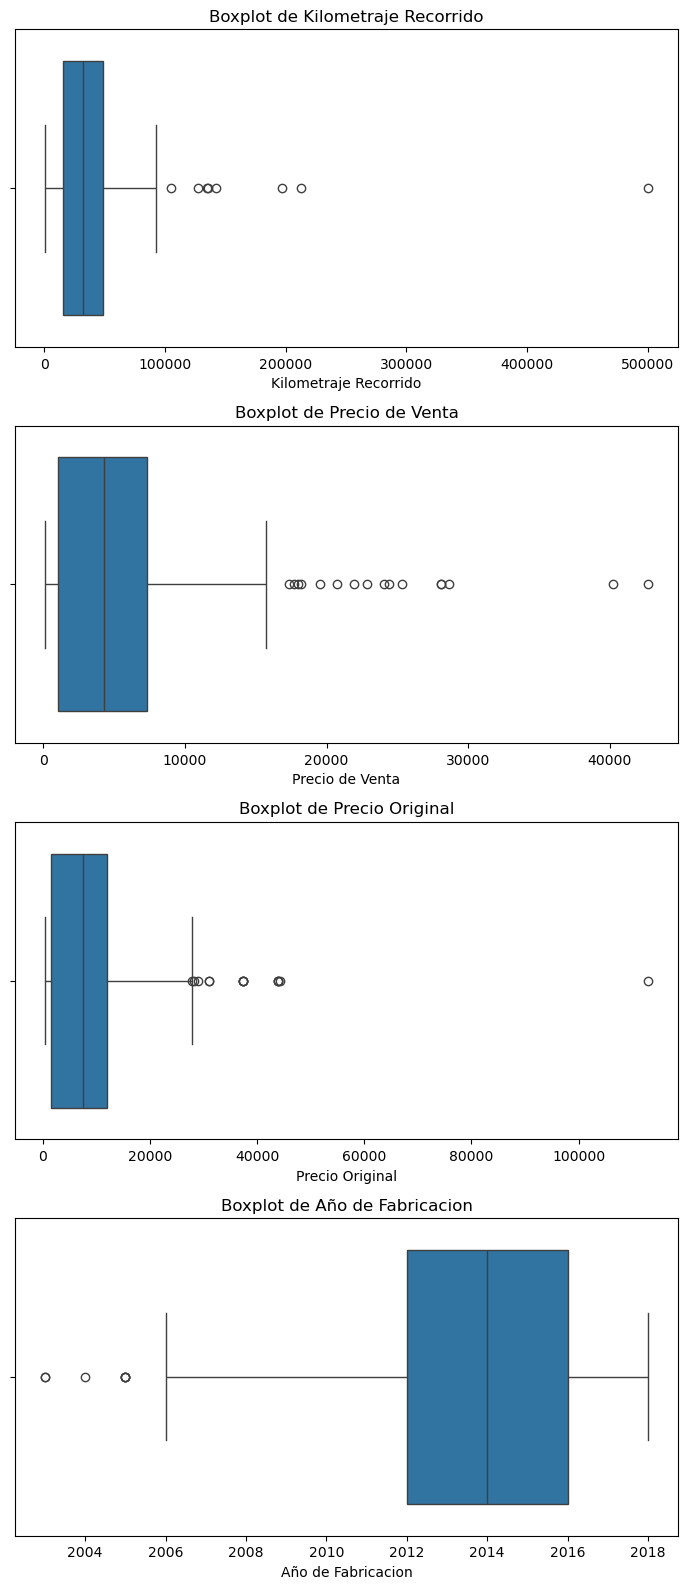

In [74]:
# 10. Visualizar boxplots antes del tratamiento
numeric_columns = ['Kilometraje Recorrido', 'Precio de Venta', 'Precio Original', 'Año de Fabricacion']
plot_boxplots(datosC, numeric_columns)

In [76]:
# 11. Aplicar el manejo de valores atípicos (Usando dEsviacion Estandar)
for column in numeric_columns:
    datosC = handle_outliers(datosC, column, 3)


Número de valores atípicos en Kilometraje Recorrido: 3
Número de valores atípicos en Precio de Venta: 8
Número de valores atípicos en Precio Original: 5
Número de valores atípicos en Año de Fabricacion: 3


In [78]:

# 13. Se visualizan los datos luego de la limpieza de los mismos
print("\nLuego de la Limpieza:")
print(datosC.describe())


Luego de la Limpieza:
       Nombre del Carro  Año de Fabricacion  Kilometraje Recorrido  \
count        299.000000          299.000000             299.000000   
mean          62.464883         2013.631352           35417.457494   
std           25.624966            2.843481           27349.533135   
min            0.000000         2004.924781             500.000000   
25%           46.500000         2012.000000           15000.000000   
50%           69.000000         2014.000000           32000.000000   
75%           82.000000         2016.000000           48883.500000   
max           97.000000         2018.000000          153962.263566   

       Tipo de Combustible  Tipo de Vendedor  Tipo de Transmision  \
count           299.000000        299.000000           299.000000   
mean              1.792642          0.354515             0.869565   
std               0.422297          0.479168             0.337346   
min               0.000000          0.000000             0.000000   
2

In [80]:
# 14. Se separan las variables independientes (X) y la variable objetivo (y)
X = datosC.drop(['Precio de Venta'], axis=1)
y = datosC['Precio de Venta']

In [82]:
# 12. Dividir el dataset en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [84]:
# 13. Se crea y entrena el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [86]:
# 14. Se analizan los Coeficientes de la regresión
# Intercepto
beta_0 = modelo.intercept_
# Coeficientes de las variables independientes
beta_coef = modelo.coef_


In [88]:

# 15. Mostrar los coeficientes junto con los nombres de las variables
for nombre, coef in zip(X.columns, beta_coef):
    print(f"Coeficiente para {nombre}: {coef:.2f}")
print(f"\nIntercepto (β0): {beta_0:.2f}")

Coeficiente para Nombre del Carro: -2.51
Coeficiente para Año de Fabricacion: 324.50
Coeficiente para Kilometraje Recorrido: -0.03
Coeficiente para Tipo de Combustible: -1438.10
Coeficiente para Tipo de Vendedor: -1077.90
Coeficiente para Tipo de Transmision: 185.15
Coeficiente para Numero de Propietarios Anteriores: -1212.83
Coeficiente para Precio Original: 0.54

Intercepto (β0): -648764.96


In [90]:
# 16. Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [92]:
# 17. Evaluar el desempeño del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Imprimir las métricas
print(f'Coeficiente de Determinacion (R²): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error cuadratico Medio (MSE): {mse:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

Coeficiente de Determinacion (R²): 0.8153575641266494
Error Absoluto Medio (MAE): 1437.8083095862396
Error cuadratico Medio (MSE): 4273957.30
Raíz del Error Cuadrático Medio (RMSE): 2067.355146567479


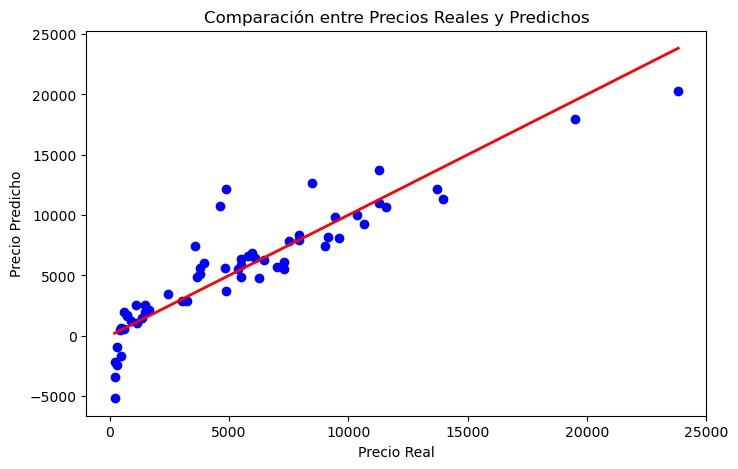

In [94]:
# 18. Gráfico de dispersión de valores reales vs predicciones

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Comparación entre Precios Reales y Predichos')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()



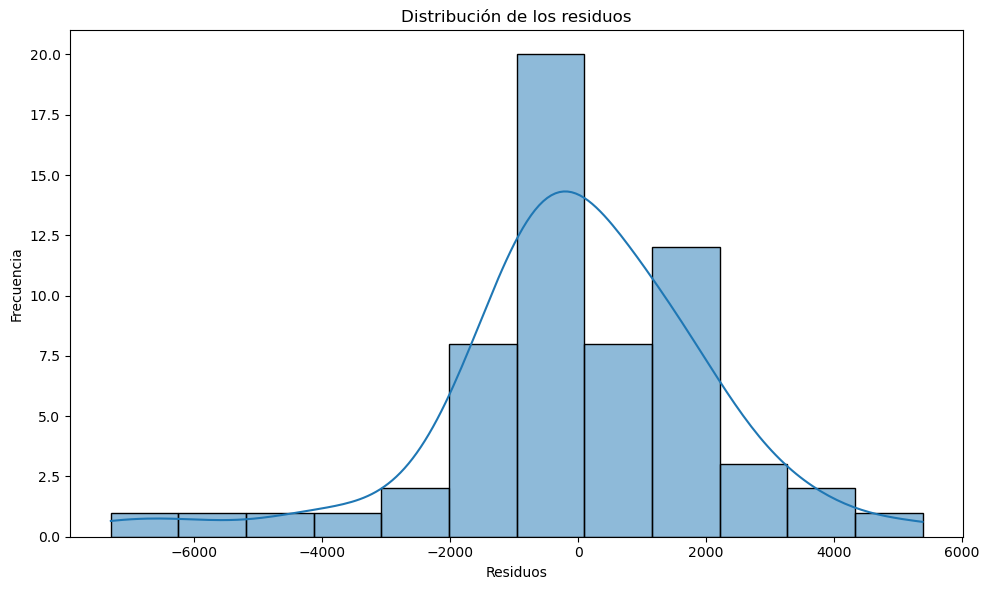

In [96]:
# 2. Histograma de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los residuos')
plt.tight_layout()
plt.show()

In [98]:
# 24. Metricas
from sklearn.metrics import precision_recall_fscore_support, classification_report

# Definir rangos de precios (ajusta estos valores según tu dataset)
def categorizar_precio(precio):
    if precio < 10000:
        return 'Bajo'
    elif precio < 20000:
        return 'Medio'
    else:
        return 'Alto'

# Convertir precios continuos a categorías
y_test_cat = np.array([categorizar_precio(p) for p in y_test])
y_pred_cat = np.array([categorizar_precio(p) for p in y_pred])

# Calcular métricas
precision, recall, f1, support = precision_recall_fscore_support(y_test_cat, y_pred_cat, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("\nInforme de clasificación detallado:")
print(classification_report(y_test_cat, y_pred_cat))

Precision:  0.9426530612244899
Recall:  0.9333333333333333
F1-score:  0.9363703703703704

Informe de clasificación detallado:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         1
        Bajo       0.98      0.94      0.96        51
       Medio       0.70      0.88      0.78         8

    accuracy                           0.93        60
   macro avg       0.89      0.94      0.91        60
weighted avg       0.94      0.93      0.94        60



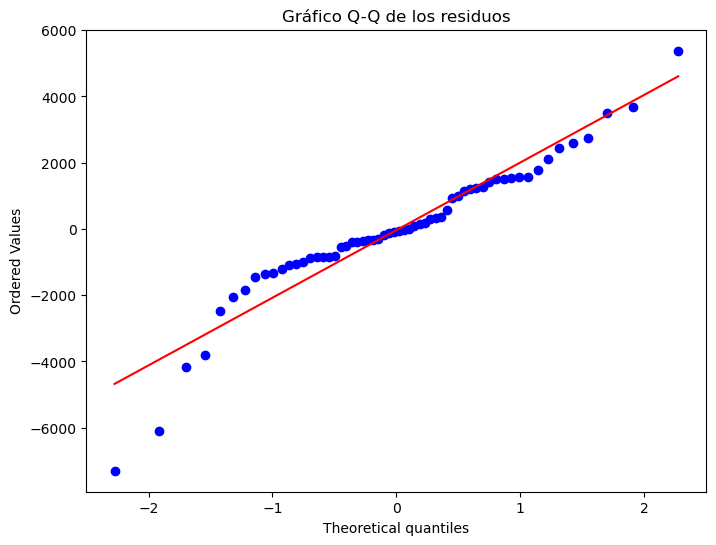

In [100]:
import scipy.stats as stats

# Gráfico Q-Q
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=ax)
ax.set_title("Gráfico Q-Q de los residuos")
plt.show()